<a href="https://colab.research.google.com/github/sarajay19/T5_W3/blob/main/CNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) using Keras
This notebook will guide you through the process of creating a CNN model using Keras. Follow the steps and fill in the code blocks as you progress.

# Dataset Card: Men vs. Women Classification

## Overview
The Men vs. Women Classification dataset contains images of men and women intended for binary image classification tasks. The goal is to classify images based on gender.

- **Dataset URL:** [Men vs. Women Classification Dataset](https://www.kaggle.com/datasets/saadpd/menwomen-classification)
- **Dataset Size:** ~845 MB
- **Classes:** 2 (Men, Women)
- **Image Format:** JPEG

## Structure

### Folders
The dataset is organized into two main folders:

- `traindata/`:
  - `traindata/`: Contains the training images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

- `testdata/`:
  - `testdata/`: Contains the testing images.
    - `men/`: Contains images of men.
    - `women/`: Contains images of women.

### Example Files
Here are some example file names you might find in the dataset:

- `traindata/traindata/men/000000899.jpg`
- `traindata/traindata/women/00000001.jpg`
- `testdata/testdata/men/00000504.jpg`
- `testdata/testdata/women/00000002.jpg`

### Image Specifications
- **Resolution:** Varies
- **Color:** RGB

## Usage
This dataset is ideal for practicing binary image classification using Convolutional Neural Networks (CNNs). It can be used to train a model to distinguish between images of men and women.

## Step 1: Import Required Libraries
Begin by importing the necessary libraries.

In [23]:
!kaggle datasets download -d saadpd/menwomen-classification
!pip install tensorflow

Dataset URL: https://www.kaggle.com/datasets/saadpd/menwomen-classification
License(s): copyright-authors
menwomen-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile
with zipfile.ZipFile('menwomen-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


In [25]:
import os
os.listdir()

['.config',
 'gender_classification_model.h5',
 'menwomen-classification.zip',
 'testdata',
 'traindata',
 'sample_data']

In [26]:
img_height, img_width = 224, 224
batch_size = 32

In [27]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess Data
Load your dataset and preprocess it. This may include resizing images, normalizing pixel values, and splitting the data into training and validation sets.

In [28]:
# Load and preprocess the data
# Hint: Use ImageDataGenerator for image preprocessing
# Example:
# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# train_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
# validation_generator = datagen.flow_from_directory('path_to_data', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

In [29]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [30]:
data = '/content/menwomen-classification.zip'

In [31]:
train_generator = datagen_train.flow_from_directory('/content/traindata/traindata', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory('/content/testdata/testdata', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', subset='validation')

Found 2891 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


## Step 3: Data Augmentation
To prevent overfitting, augment your data using various transformations like rotation, zoom, flip, etc.

In [32]:
# Data Augmentation
# Example:
# datagen_train = ImageDataGenerator(
#    rescale=1./255,
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

In [33]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Step 4: Build the CNN Model
Define the architecture of your CNN model. Start with convolutional layers followed by pooling layers, and end with fully connected layers.

In [34]:
# Build the model
# Example:
# model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D(2, 2),
#    Conv2D(64, (3, 3), activation='relu'),
#    MaxPooling2D(2, 2),
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dropout(0.5),
#    Dense(num_classes, activation='softmax')
# ])
# model.summary()

In [35]:
"""model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()"""

"model = Sequential([\n    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),\n    MaxPooling2D(2, 2),\n    Conv2D(64, (3, 3), activation='relu'),\n    MaxPooling2D(2, 2),\n    Conv2D(128, (3, 3), activation='relu'),\n    MaxPooling2D(2, 2),\n    Flatten(),\n    Dense(128, activation='relu'),\n    Dropout(0.5),\n    Dense(1, activation='sigmoid')\n])\nmodel.summary()"

In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Men and Women
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Compile the Model
Compile your model by specifying the optimizer, loss function, and evaluation metrics.

In [37]:
# Compile the model
# Example:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
"""model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss function"""

"model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss function"

## Step 6: Train the Model
Train your model using the training data and validate it using the validation data.

In [42]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.6394 - loss: 0.7704 - val_accuracy: 0.6868 - val_loss: 0.6279
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.6698 - loss: 0.6261 - val_accuracy: 0.6868 - val_loss: 0.6116
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.6542 - loss: 0.6354 - val_accuracy: 0.6717 - val_loss: 0.6113
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.6641 - loss: 0.6260 - val_accuracy: 0.6906 - val_loss: 0.5850
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.6762 - loss: 0.6084 - val_accuracy: 0.6906 - val_loss: 0.5740
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.6677 - loss: 0.6177 - val_accuracy: 0.6906 - val_loss: 0.5880
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.6701 - loss: 0.6261 - val_accuracy: 0.6981 - val_loss: 0.5857
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.6744 - loss: 0.6313 - val_accuracy: 0.6868 - v

## Step 7: Evaluate the Model
Evaluate the performance of your model using the validation set.

In [43]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6764 - loss: 0.5947
Validation Loss: 0.5680845379829407
Validation Accuracy: 0.7132075428962708


## Step 8: Save the Model
Finally, save your trained model for future use.

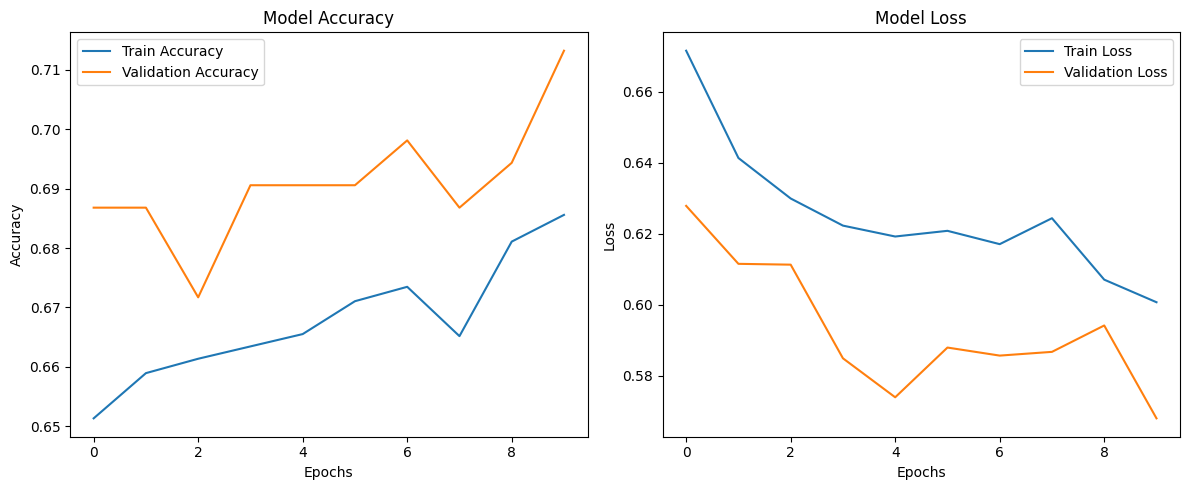

In [44]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
model.save('gender_classification_model.h5')